[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/FatbandsPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/FatbandsPlot)

    
    
FatbandsPlot
=========

In [1]:
import sisl
import sisl.viz

For this notebook we will create a toy "Boron nitride" tight binding:

In [2]:
# First, we create the geometry
BN = sisl.geom.graphene(atoms=["B", "N"])

# Create a hamiltonian with different on-site terms
H = sisl.Hamiltonian(BN)

H[0, 0] = 2
H[1, 1] = -2

H[0, 1] = -2.7
H[1, 0] = -2.7

H[0, 1, (-1, 0)] = -2.7
H[0, 1, (0, -1)] = -2.7
H[1, 0, (1, 0)] = -2.7
H[1, 0, (0, 1)] = -2.7

Note that we could have obtained this hamiltonian from any other source. Then we generate a path for the band structure:

In [3]:
band = sisl.BandStructure(H, [[0., 0.], [2./3, 1./3],
                              [1./2, 1./2], [1., 1.]], 301,
                              [r'$\Gamma$', 'K', 'M', r'$\Gamma$'])

And finally we just ask for the fatbands plot:

In [4]:
fatbands = band.plot.fatbands()
fatbands

FigureWidget({
    'data': [{'hoverinfo': 'name',
              'hovertemplate': '%{y:.2f} eV',
              …

We only see the bands here, but this is a fatbands plot, and it is ready to accept your requests on what to draw!

## Requesting specific weights

The fatbands that the plot draws are controlled by the `groups` setting.

In [5]:
print(fatbands.get_param("groups").help)

The different groups that are displayed in the fatbands

 Each item is a dict. Structure of the expected dicts:{
	'name': 
	'species': 
	'atoms': 
	'orbitals': 
	'spin': 
	'normalize': 
	'color': 
	'scale': 
}


This setting works exactly like the `requests` setting in `PdosPlot`, which is documented [here](./PdosPlot.ipynb). Therefore we won't give an extended description of it, but just quickly show that you can autogenerate the groups:

In [6]:
fatbands.split_groups(on="species")

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': ' | species=B',
              'lin…

Or write them yourself if you want the maximum flexibility:

In [7]:
fatbands.update_settings(groups=[
    {"species": "N", "color": "blue", "name": "Nitrogen"},
    {"species": "B", "color": "red", "name": "Boron"}
])

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': …

## Scaling fatbands

The visual appeal of fatbands depends a lot on the size of your plot, therefore there's one global `scale` setting that scales all fatbands at the same time:

In [8]:
fatbands.update_settings(scale=2)

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': …

You can also use the `scale_fatbands` method, which additionally lets you choose if you want to rescale from the current size or just set the value of `scale`:

In [9]:
fatbands.scale_fatbands(0.5, from_current=True)

FigureWidget({
    'data': [{'fill': 'toself',
              'legendgroup': 'Nitrogen',
              'line': …

## Use BandsPlot settings

All settings of `BandsPlot` work as well for `FatbandsPlot`. Even spin texture!

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

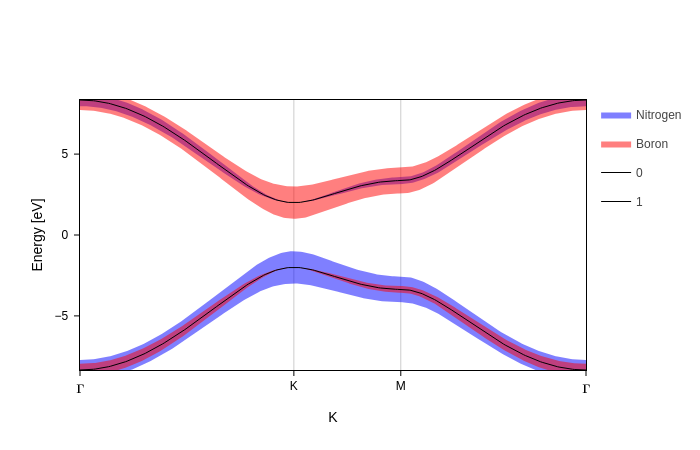

In [10]:
thumbnail_plot = fatbands

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------